In [11]:
HOUSING_PATH = '../ml/machine_learning/datasets/housing/'

In [12]:
import pandas as pd
import os



def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [16]:
import numpy as np

In [17]:
np.random.seed(42)

In [19]:
np.random.permutation(5)

array([1, 4, 2, 0, 3])

In [33]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [34]:
data = load_housing_data()
train_set,test_set = split_train_test(data,0.2)
print(len(train_set),"train + ", len(test_set),"test")

16512 train +  4128 test


In [37]:
#With unique and immutable identifier
import hashlib

def test_set_check(identifier,test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio,hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = data.reset_index() #adds an index to the column
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,"index")
print(len(train_set),"train+",len(test_set),"test")
    
    

16362 train+ 4278 test


In [ ]:
from sklearn.model_selection import train_test_split
help(train_test_split)

In [38]:
#Sample bias , (Convenience sample. voluntary response, Non-response)(Simple random sample, Stratified sampling and Cluster sample)

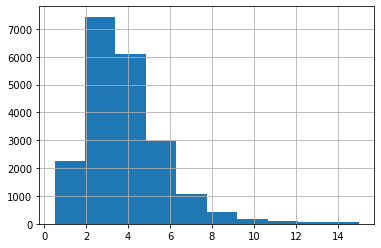

In [43]:
data["median_income"].hist()

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

In [45]:
split = StratifiedShuffleSplit(n_splits = 1 , test_size =0.2, random_state = 42)

In [51]:
np.ceil(data["median_income"]/1.5).value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: median_income, dtype: int64

In [52]:
data["income_cat"] = np.ceil(data["median_income"]/1.5)

In [54]:
data["income_cat"]

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

In [59]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(data,data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [60]:
#Income category proportion in test set generated with stratified sample
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
9.0     0.002422
11.0    0.002422
10.0    0.000727
Name: income_cat, dtype: float64

In [62]:
#Income category proportion in full dataset
data["income_cat"].value_counts() / len(data)

3.0     0.350581
2.0     0.318847
4.0     0.176308
5.0     0.068944
1.0     0.039826
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [69]:
#Lets compare income category proportion in stratified sampling and random sampling
from sklearn.model_selection import train_test_split
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set, test_set = train_test_split(data,test_size=0.2,random_state= 42)
compare_props = pd.DataFrame({
    "Overall":income_cat_proportions(data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random":income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"]/compare_props["Overall"]
compare_props["Strat. %error"] = 100 * compare_props["Stratified"]/compare_props["Overall"]




In [70]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,100.973236,99.756691
2.0,0.318847,0.318798,0.324370,101.732260,99.984805
3.0,0.350581,0.350533,0.358527,102.266446,99.986180
4.0,0.176308,0.176357,0.167393,94.943666,100.027480
5.0,0.068944,0.069041,0.064922,94.167252,100.140548
6.0,0.025775,0.025678,0.024709,95.864662,99.624060
7.0,0.009157,0.009205,0.008721,95.238095,100.529101
8.0,0.005087,0.005087,0.005572,109.523810,100.000000
9.0,0.002422,0.002422,0.002665,110.000000,100.000000
10.0,0.000678,0.000727,0.000969,142.857143,107.142857


In [72]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1,inplace=True)

In [73]:
housing = strat_train_set.copy()

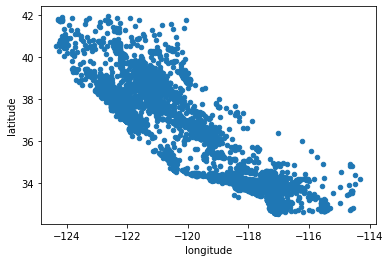

In [75]:
housing.plot(kind="scatter",x="longitude",y="latitude")

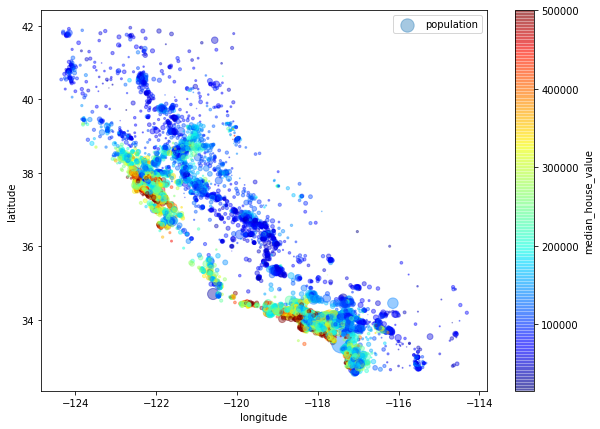

In [79]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",figsize=(10,7),c= "median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend()

In [80]:

housing["population"]

17606     710.0
15698     304.0
14650     936.0
3230     1460.0
3555     4459.0
          ...  
6563      573.0
12053    1052.0
13908    2098.0
11159    1356.0
15775    1269.0
Name: population, Length: 16512, dtype: float64

In [81]:
corr_matrix = housing.corr()

In [82]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924515,-0.109796,0.048963,0.075583,0.107149,0.061549,-0.015589,-0.045056
latitude,-0.924515,1.000000,0.009864,-0.039721,-0.071816,-0.115095,-0.076752,-0.078979,-0.144684
housing_median_age,-0.109796,0.009864,1.000000,-0.363195,-0.324448,-0.297841,-0.305708,-0.116608,0.111770
total_rooms,0.048963,-0.039721,-0.363195,1.000000,0.928874,0.855803,0.917204,0.203718,0.135989
total_bedrooms,0.075583,-0.071816,-0.324448,0.928874,1.000000,0.876225,0.979599,-0.005800,0.049177
population,0.107149,-0.115095,-0.297841,0.855803,0.876225,1.000000,0.905172,0.007472,-0.024765
households,0.061549,-0.076752,-0.305708,0.917204,0.979599,0.905172,1.000000,0.014929,0.065841
median_income,-0.015589,-0.078979,-0.116608,0.203718,-0.005800,0.007472,0.014929,1.000000,0.687474
median_house_value,-0.045056,-0.144684,0.111770,0.135989,0.049177,-0.024765,0.065841,0.687474,1.000000


In [83]:
corr_matrix["median_house_value"]

longitude            -0.045056
latitude             -0.144684
housing_median_age    0.111770
total_rooms           0.135989
total_bedrooms        0.049177
population           -0.024765
households            0.065841
median_income         0.687474
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75dc7b65c0>,
      dtype=object)

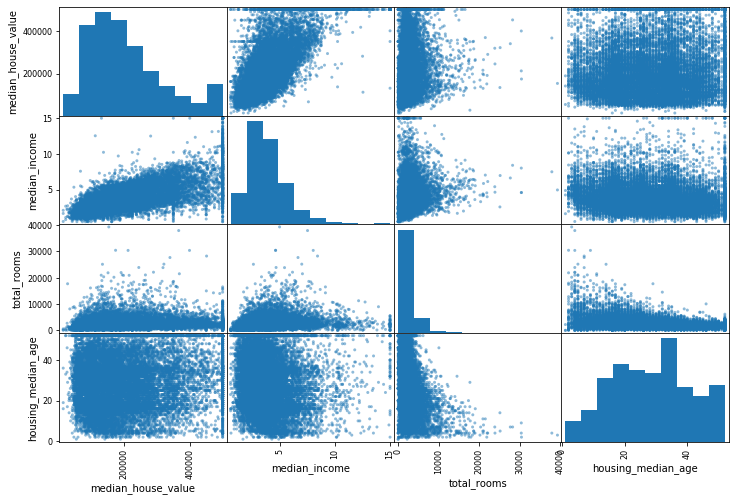

In [85]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

[0, 16, 0, 550000]

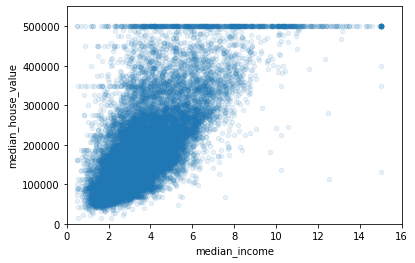

In [86]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.axis([0,16,0,550000])

In [87]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy() #Note drop() creates a copy of the data and does not affect strat_train_set

In [92]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head(100)
sample_incomplete_rows

#option1 drop na
#sample_incomplete_rows.dropna(subset=["total_bedrooms"])
#sample_incomplete_rows.dropna(["total_bedrooms",axis = 1])

isn = housing.isnull()
isn.any(axis=1)
#Fillna() with median values
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median,inplace=True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,434.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,434.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,434.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,434.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,434.0,3468.0,1405.0,3.1662,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
14986,-117.03,32.73,34.0,2061.0,434.0,1169.0,400.0,3.5096,NEAR OCEAN
4186,-118.23,34.13,48.0,1308.0,434.0,835.0,294.0,4.2891,<1H OCEAN
16105,-122.50,37.75,44.0,1819.0,434.0,1137.0,354.0,3.4919,NEAR OCEAN
7668,-118.08,33.92,38.0,1335.0,434.0,1011.0,269.0,3.6908,<1H OCEAN


In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')



In [96]:
housing_num = housing.drop('ocean_proximity',axis=1) #Bcuzthis is a text attribute and insignificant

In [97]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [98]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [100]:
X= imputer.transform(housing_num)

In [101]:
X


array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-122.46  ,   37.79  ,   52.    , ...,  304.    ,  110.    ,
          14.2959],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [102]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [103]:
#Conver OCean Proximity to numbers categorical to number
housing_cat = housing['ocean_proximity']
housing_cat.head(10)


17606     <1H OCEAN
15698      NEAR BAY
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
9026     NEAR OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [104]:
#Pandas factorize 
df=pd.DataFrame({
    'A':['type1','type2','type3','type2','type0']
})
df['A'].factorize()

(array([0, 1, 2, 1, 3]),
 Index(['type1', 'type2', 'type3', 'type0'], dtype='object'))

In [105]:
df

,A
0,type1
1,type2
2,type3
3,type2
4,type0


In [106]:
housing_cat_encoded,housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]
#Check encoding classes
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [107]:
#Check encoding classess
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [108]:
housing_cat_encoded

array([0, 1, 2, ..., 3, 0, 1])

In [109]:
#we are using one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [110]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [111]:
# Just run this cell, or copy it to your code, do not try to understand it (yet).
# Definition of the CategoricalEncoder class, copied from PR #9151.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [112]:
# The CategoricalEncoder expects a 2D array containing one or more categorical input features. 
# We need to reshape `housing_cat` to a 2D array:

cat_encoder = CategoricalEncoder(encoding="onehot-dense")
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [113]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-122.46,37.79,52,899,96,304,110,14.2959,NEAR BAY,8.17273,2.76364
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [115]:
# Feature Scaling - Min-max Scaling - Example
# Creating DataFrame first

s1 = pd.Series([1, 2, 3, 4, 5, 6], index=(range(6)))
s2 = pd.Series([10, 9, 8, 7, 6, 5], index=(range(6)))
df = pd.DataFrame(s1, columns=['s1'])
df['s2'] = s2
df

,s1,s2
0,1,10
1,2,9
2,3,8
3,4,7
4,5,6
5,6,5


In [116]:
# Use Scikit-Learn minmax_scaling

from mlxtend.preprocessing import minmax_scaling
minmax_scaling(df, columns=['s1', 's2'])

,s1,s2
0,0.0,1.0
1,0.2,0.8
2,0.4,0.6
3,0.6,0.4
4,0.8,0.2
5,1.0,0.0


In [117]:
# Now let's build a pipeline for preprocessing the numerical attributes:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [118]:
housing_num_tr

array([[-1.15788621,  0.77388697,  0.74440696, ..., -0.31200699,
        -0.08649926,  0.1663318 ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  1.04438561,
        -0.02872844, -1.72035025],
       [ 1.18471864, -1.3403487 ,  0.18806557, ..., -0.46505337,
        -0.09240558,  0.44738297],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.34606045,
        -0.0305544 , -0.5467078 ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.02457121,
         0.06150939, -0.31674597],
       [-1.43760023,  0.99840757,  1.85708974, ..., -0.22859871,
        -0.09586355,  0.10997909]])

In [119]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [120]:
#Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])

In [121]:
num_pipeline.fit_transform(housing)


array([[-1.15788621,  0.77388697,  0.74440696, ..., -0.31200699,
        -0.08649926,  0.1663318 ],
       [-1.44259512,  1.0077626 ,  1.85708974, ...,  1.04438561,
        -0.02872844, -1.72035025],
       [ 1.18471864, -1.3403487 ,  0.18806557, ..., -0.46505337,
        -0.09240558,  0.44738297],
       ...,
       [ 1.58431009, -0.72291704, -1.56043594, ...,  0.34606045,
        -0.0305544 , -0.5467078 ],
       [ 0.7801323 , -0.84920988,  0.18806557, ...,  0.02457121,
         0.06150939, -0.31674597],
       [-1.43760023,  0.99840757,  1.85708974, ..., -0.22859871,
        -0.09586355,  0.10997909]])

In [122]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [123]:
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,NEAR BAY
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [124]:

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared[0])
print(housing_prepared[1])
print(housing_prepared[2])

[-1.15788621  0.77388697  0.74440696 -0.49193928 -0.44661253 -0.63588742
 -0.42193926 -0.61567811 -0.31200699 -0.08649926  0.1663318   1.
  0.          0.          0.          0.        ]
[-1.44259512  1.0077626   1.85708974 -0.80229001 -1.06646346 -0.99850369
 -1.03082399  5.48832516  1.04438561 -0.02872844 -1.72035025  0.
  0.          0.          1.          0.        ]
[ 1.18471864 -1.3403487   0.18806557 -0.31380075 -0.15491798 -0.43403698
 -0.09489638 -0.5325305  -0.46505337 -0.09240558  0.44738297  0.
  0.          0.          0.          1.        ]


In [125]:
#Lets select and train a model
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
# Let's try the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [209300.18149413 661078.1135578  210913.91718561  57466.84542129
 186707.41879655]


In [127]:
# Print the actual values

print("Labels:", list(some_labels))

Labels: [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [128]:

# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68321.70513040475

In [129]:
# Train a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [130]:
# Calculate RMSE in Decision Tree model

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [131]:
# Performs K-fold cross-validation
# Randomly splits the training set into 10 distinct subsets called folds
# Then it trains and evaluates the Decision Tree model 10 times By
# Picking a different fold for evaluation every time and training on the other 9 folds
# The result is an array containing the 10 evaluation scores

from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [132]:
# Look at the score of cross-validation of DecisionTreeRegressor

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70137.77419861 66429.02636367 68213.99104459 69727.45446404
 71042.2534906  75796.90934692 68061.27764121 73954.51995469
 76196.81985854 71410.12599437]
Mean: 71097.01523572522
Standard deviation: 3138.1025106890474


In [133]:

# Now compute the same score for Linear Regression

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66614.9761906  66150.38653105 67344.60010664 74470.89010773
 71434.35592111 69791.47991185 65376.52916665 67643.17772272
 69655.23105926 67378.82020947]
Mean: 68586.04469270927
Standard deviation: 2633.3746663788183


In [134]:
# Let's train one more model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [135]:
# Calculate RMSE in Random Forest model

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18716.069693343314

In [137]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49711.99503855 47481.37320355 49651.99035791 51910.24047959
 51294.3827524  53430.19827451 48565.48451882 48709.2721103
 52881.14963825 50946.58934429]
Mean: 50458.26757181634
Standard deviation: 1856.3140955276544


In [138]:
#Fine-tune the Model
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

count = 0;
for i in [3, 10, 30]:
    for j in  [2, 4, 6, 8]:
        print(" I am goin to try %d <> %d" % (i, j) )
        count += 1

for k in [False]:
    for i in [3, 10]:
        for j in  [2, 3, 4]:
            print(" I am goin to try %d <> %d <> %s" % (i, j, k) )
            count += 1
print(count)

 I am goin to try 3 <> 2
 I am goin to try 3 <> 4
 I am goin to try 3 <> 6
 I am goin to try 3 <> 8
 I am goin to try 10 <> 2
 I am goin to try 10 <> 4
 I am goin to try 10 <> 6
 I am goin to try 10 <> 8
 I am goin to try 30 <> 2
 I am goin to try 30 <> 4
 I am goin to try 30 <> 6
 I am goin to try 30 <> 8
 I am goin to try 3 <> 2 <> False
 I am goin to try 3 <> 3 <> False
 I am goin to try 3 <> 4 <> False
 I am goin to try 10 <> 2 <> False
 I am goin to try 10 <> 3 <> False
 I am goin to try 10 <> 4 <> False
18


In [139]:
# GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [140]:
# The best hyperparameter combinations

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [141]:
# Get the best estimator

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [142]:
# Let's look at the score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64091.21498982918 {'max_features': 2, 'n_estimators': 3}
56074.37757915087 {'max_features': 2, 'n_estimators': 10}
53338.31759959696 {'max_features': 2, 'n_estimators': 30}
60957.783328998754 {'max_features': 4, 'n_estimators': 3}
52438.718900604435 {'max_features': 4, 'n_estimators': 10}
50466.74375411806 {'max_features': 4, 'n_estimators': 30}
58934.39505646842 {'max_features': 6, 'n_estimators': 3}
52358.69434797582 {'max_features': 6, 'n_estimators': 10}
50553.64801392967 {'max_features': 6, 'n_estimators': 30}
57946.692513782094 {'max_features': 8, 'n_estimators': 3}
52080.27200438423 {'max_features': 8, 'n_estimators': 10}
49907.986489374336 {'max_features': 8, 'n_estimators': 30}
62231.77677083342 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55057.866801995166 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61312.82955493603 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52857.70053561245 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [143]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [144]:
#Go to Slide Analyze the Best Models and Their Errors
# See the importance score of each attribute in GridSearchCV

feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3685171106537971, 'median_income'),
 (0.16210502746474625, 'INLAND'),
 (0.1052381716160524, 'pop_per_hhold'),
 (0.06859876184021065, 'longitude'),
 (0.0625044106995295, 'bedrooms_per_room'),
 (0.061037589700178474, 'latitude'),
 (0.05057147938680182, 'rooms_per_hhold'),
 (0.04584805882516527, 'housing_median_age'),
 (0.01600254200544188, 'population'),
 (0.015158075164252277, 'total_bedrooms'),
 (0.01477335694396894, 'total_rooms'),
 (0.013624730855352344, 'households'),
 (0.010063213777211217, '<1H OCEAN'),
 (0.004104452893741249, 'NEAR OCEAN'),
 (0.0017988154754299518, 'NEAR BAY'),
 (5.420269812076476e-05, 'ISLAND')]

In [145]:
# Evaluate model on the Test Set

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [146]:
final_rmse


47184.285630479746